# PREDICTION USING SUPERVISED ML
Predict the percentage of an student based on the number of study hours.

Simple Linear Regression : In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author: Ramchandra Darade

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [3]:
df = pd.read_csv("http://bit.ly/w-data")

# Data Exploration / Understanding

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Model Building

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

# Define target (y) and features (X)
# Preparing the data

In [15]:
y= df["Scores"]
x= df[["Hours"]]

In [16]:
df.shape

(25, 2)

In [17]:
x.shape

(25, 1)

In [18]:
y.shape

(25,)

# Model Training

# Using Train_Test Split Method

In [22]:
from sklearn.model_selection import train_test_split 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [27]:
x_train

,Hours
9,2.7
3,8.5
16,2.5
12,4.5
22,3.8
4,3.5
10,7.7
5,1.5
19,7.4
1,5.1


In [28]:
x_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [29]:
y_train

9     25
3     75
16    30
12    41
22    35
4     30
10    85
5     20
19    69
1     47
2     27
7     60
21    54
20    30
18    67
11    62
24    86
13    42
15    95
8     81
Name: Scores, dtype: int64

In [30]:
y_test

14    17
0     21
17    24
6     88
23    76
Name: Scores, dtype: int64

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

# Model Selection

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

# Train and fit model

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
print("Training completed.")

Training completed.


# Model Interpratation

In [39]:
model.intercept_

1.5079104828268939

In [40]:
model.coef_

array([9.94061514])

In [41]:
model.score(x_test,y_test)

0.9735538080811826

In [43]:
#Predict model
y_pred = model.predict(x_test)

In [44]:
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [45]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


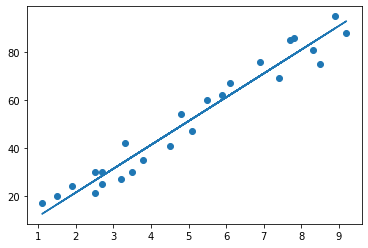

In [49]:
# Plotting the regression line
# y= mx+c
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Model Evaluation / Accuracy


In [62]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score


In [63]:
mean_absolute_error(y_test,y_pred)

4.877039354964476

In [64]:
mean_absolute_percentage_error(y_test,y_pred)

0.16150745936804844

In [65]:
mean_squared_error(y_test,y_pred)

24.387620339856596

In [66]:
r2_score(y_test,y_pred)

0.9735538080811826